In [1]:
# !git clone https://github.com/ghadialhajj/FF_unsupervised.git foo; mv foo/* foo/.git* .; rm -r foo

In [2]:
import sys
# Don't generate the __pycache__ folder locally
sys.dont_write_bytecode = True 

import torch
import torchvision
from torch.utils.data import DataLoader
from main import Unsupervised_FF, train, plot_loss
from utils import prepare_data

In [3]:
# Prepare dataset
prepare_data()

# Load the MNIST dataset
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

pos_dataset = torchvision.datasets.MNIST(root='./', download=False, transform=transform, train=True)
# pos_dataset = Subset(pos_dataset, list(range(1000)))

# Create the data loader
pos_dataloader = DataLoader(pos_dataset, batch_size=64, shuffle=True, num_workers=0)

# Load the transformed images
neg_dataset = torch.load('transformed_dataset.pt')

# Create the data loader
neg_dataloader = DataLoader(neg_dataset, batch_size=64, shuffle=True, num_workers=0)

# Load the test images
test_dataset = torchvision.datasets.MNIST(root='./', train=False, download=False, transform=transform)

# Create the data loader
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True, num_workers=0)

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

unsupervised_ff = Unsupervised_FF(device = device, n_epochs = 10)

loss = train(unsupervised_ff, pos_dataloader, neg_dataloader)

Training FF Layers:   0%|          | 0/10 [00:00<?, ?it/s]

Training FF Layers | Epoch 0: 0it [00:00, ?it/s]

Training FF Layers | Epoch 1: 0it [00:00, ?it/s]

Training FF Layers | Epoch 2: 0it [00:00, ?it/s]

Training FF Layers | Epoch 3: 0it [00:00, ?it/s]

Training FF Layers | Epoch 4: 0it [00:00, ?it/s]

Training FF Layers | Epoch 5: 0it [00:00, ?it/s]

Training FF Layers | Epoch 6: 0it [00:00, ?it/s]

Training FF Layers | Epoch 7: 0it [00:00, ?it/s]

Training FF Layers | Epoch 8: 0it [00:00, ?it/s]

Training FF Layers | Epoch 9: 0it [00:00, ?it/s]

Training Last Layer:   0%|          | 0/10 [00:00<?, ?it/s]

Training Last Layer | Epoch 0:   0%|          | 0/938 [00:00<?, ?it/s]

Training Last Layer | Epoch 1:   0%|          | 0/938 [00:00<?, ?it/s]

Training Last Layer | Epoch 2:   0%|          | 0/938 [00:00<?, ?it/s]

Training Last Layer | Epoch 3:   0%|          | 0/938 [00:00<?, ?it/s]

Training Last Layer | Epoch 4:   0%|          | 0/938 [00:00<?, ?it/s]

Training Last Layer | Epoch 5:   0%|          | 0/938 [00:00<?, ?it/s]

Training Last Layer | Epoch 6:   0%|          | 0/938 [00:00<?, ?it/s]

Training Last Layer | Epoch 7:   0%|          | 0/938 [00:00<?, ?it/s]

Training Last Layer | Epoch 8:   0%|          | 0/938 [00:00<?, ?it/s]

Training Last Layer | Epoch 9:   0%|          | 0/938 [00:00<?, ?it/s]

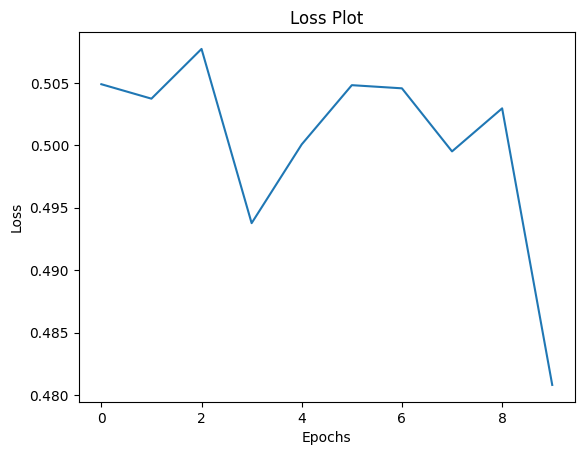

In [5]:
plot_loss(loss)

In [6]:
unsupervised_ff.evaluate(pos_dataloader, dataset_type = "Train")
unsupervised_ff.evaluate(test_dataloader, dataset_type = "Test")

Evaluating model:   0%|          | 0/938 [00:00<?, ?it/s]

Train dataset scores:  accuracy_score: 0.8765666666666667


Evaluating model:   0%|          | 0/157 [00:00<?, ?it/s]

Test dataset scores:  accuracy_score: 0.8676
